# 约束最小二乘方滤波

约束最小二乘方滤波会对每幅图像都会产生最有的结果。当然，要记住的是，这些最优性的准则是从理论上的，而与视觉感知的无关
根据卷积的定义
$$
    (f \star h)(x,y) = \sum_{m=0}^{m-1}\sum_{n=0}^{n-1}f(m,n)h(x-m,y-n)
$$
可将式表示为向量-矩阵形式:
$$
    g = Hf + \eta
$$
于是图像复原问题看起来就转化为了简单的矩阵运算。然而事实并非如此。加入我门正在处理一个中等大小的图像譬如$M=N=512$ 。于是，式中向量的维数是$262144\times1$ ， 矩阵H的维数是$262144\times262144$。

约束最小二乘方方法和核心是H的对噪声敏感的问题。降低其对噪声敏感的一种方法是，以平滑测度的最有复原为基础。如一幅图像的二阶导数（拉普拉斯算子）。要使复原有意义，就必须使用问题参数来约束复原。因此我们须要求准则函数C的最小之，定义为
$$
    C = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[\triangledown^2f(x,y)]^2
$$
约束条件 
$$
    ||g-\widehat{f}||^2 = ||\eta||^2
$$
式中，$||a^2|| = a^T a $ 是欧几里德范数，$\triangledown^2$是拉普拉斯算子，$\widehat{f}$是为退化的估计图像

这个最优问题的频率域的解(拉格兰日乘数法)是:
$$
    \widehat{F}(u,v) = [\frac{H^*(u,v)}{|H(u,v)|^2 + \gamma|P(u,v)^2|}]G(u,v)
$$

In [24]:
import numpy as np 
from matplotlib import pyplot as plt 
from util import *

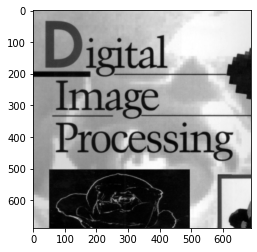

In [25]:
# 这是我们的原图像
f = plt.imread("./../images/book-cover.tif")
f = f.copy()
plt.imshow(f,"gray")

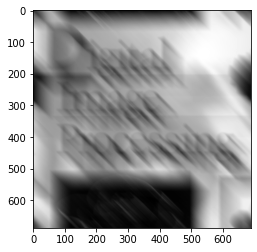

In [26]:
# 现在我们为原图像增加运动模糊
f.flags.writeable = True
blur_f , H = motion_blur(f, 0.1,0.1 ,1)
plt.imshow(blur_f.copy() , 'gray')

In [27]:
# 为模糊后的图像添加不同程度的高斯噪声
noise_f_10 = gauss_noise(blur_f.copy(),10)
noise_f_20 = gauss_noise(blur_f.copy(),20 )
noise_f_30 = gauss_noise(blur_f.copy(),30)

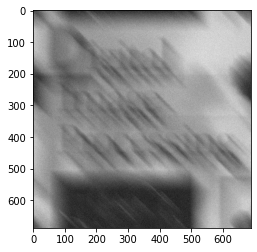

In [28]:

plt.imshow(noise_f_10,"gray")

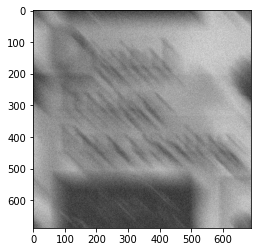

In [29]:
plt.imshow(noise_f_20,"gray")

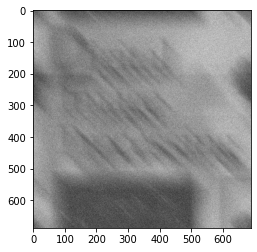

In [30]:
plt.imshow(noise_f_30,"gray")

## 接下来就要准备我们的约束最小二乘方滤波拉

In [34]:

h , w = f.shape

def constraint_lease_square(g,r, h, w):   
    G = np.fft.ifftshift( np.fft.fft2(g))  
    lp_m = np.array([
        [0, - 1 , 0],
        [-1 , 4 , -1 ],
        [0 , -1 , 0]
    ])
    flp = np.fft.fftshift(np.fft.fft2(lp_m ,[h,w]))
    F_hat = np.conjugate(H) / (np.abs(H) ** 2 + r*np.abs(flp) ** 2) * np.fft.fftshift(np.fft.fft2(noise_f_10))
    return np.fft.fftshift(F_hat) 

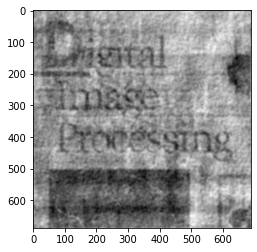

In [51]:
# 让我们分别看3个图像
F_hat_1 = constraint_lease_square(noise_f_10, 0.03 , h , w)
f_hat_1 = np.real(np.fft.ifft2(F_hat_1))

plt.imshow(f_hat_1 , 'gray')

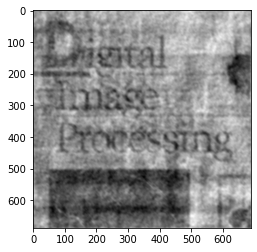

In [52]:

F_hat_2 = constraint_lease_square(noise_f_20, 0.06 , h , w)
f_hat_2 = np.real(np.fft.ifft2(F_hat_2))

plt.imshow(f_hat_2 , 'gray')

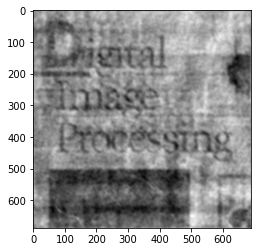

In [54]:
F_hat_3 = constraint_lease_square(noise_f_30, 0.1 , h , w)
f_hat_3 = np.real(np.fft.ifft2(F_hat_3))

plt.imshow(f_hat_3 , 'gray')

 以上r值是手动调的